# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [2]:
from sklearn import datasets
wine = datasets.load_wine()

In [3]:
X = wine.data

In [4]:
y = wine.target

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [5]:
from sklearn.cluster import KMeans

In [6]:
inertias = [KMeans(k).fit(X).inertia_ for k in range(1,10)]
inertias

[17592296.383508474,
 4543749.614531863,
 2370689.6867829696,
 1336362.1113294214,
 916379.1871539167,
 647326.0020260852,
 412137.5091004584,
 323385.0131874432,
 273142.6378466976]

In [7]:
import matplotlib.pyplot as plt

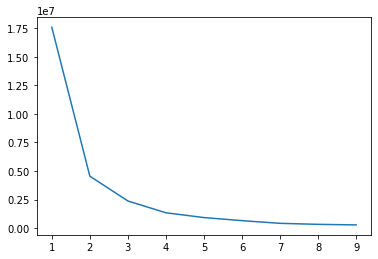

In [8]:
plt.plot(range(1,10), inertias) #the best "k" is 2

In [9]:
kmeans = KMeans(n_clusters = 8, random_state = 42).fit(X) 

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [12]:
kmeans = KMeans(n_clusters = 5, random_state = 42).fit(X) 

In [13]:
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [14]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(X) 

In [15]:
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [41]:
from yellowbrick.cluster import KElbowVisualizer

In [42]:
model = KMeans()

In [54]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion')

In [55]:
visualizer.fit(X)
visualizer.show() #I don't know why It's not working

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

In [57]:
visualizer.fit(X)
visualizer.show() #I don't know why It's not working

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [65]:
visualizer = KElbowVisualizer(model, k=(2,10), metric= "calinski_harabasz")

In [66]:
visualizer.fit(X)
visualizer.show() #I don't know why It's not working

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [67]:
from sklearn.cluster import AgglomerativeClustering

In [125]:
clustering = AgglomerativeClustering()

In [126]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion')

In [127]:
visualizer.fit(X)
visualizer.show() #I don't know why It's not working

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [128]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

In [129]:
visualizer.fit(X)
visualizer.show() #I don't know why It's not working

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [130]:
visualizer = KElbowVisualizer(model, k=(2,10), metric= "calinski_harabasz")

In [131]:
visualizer.fit(X)
visualizer.show() #I don't know why It's not working

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [70]:
#The best one of the above is the one with 3 clusters (although probably 2 clusters is better (According to my inertias calculations)

In [110]:
kmeans = KMeans(n_clusters = 2, random_state = 42).fit(X) 

In [112]:
silhouette_score(X, kmeans.labels_, metric='euclidean') #YEs, with 2 clusters is better, I'll do it with three though.

0.6568536504294319

In [113]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(X) 

In [114]:
df_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
df_wine['class'] = pd.Series(wine.target)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [115]:
import seaborn as sns
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']
df_wine['labels'] = kmeans.labels_

In [116]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,12

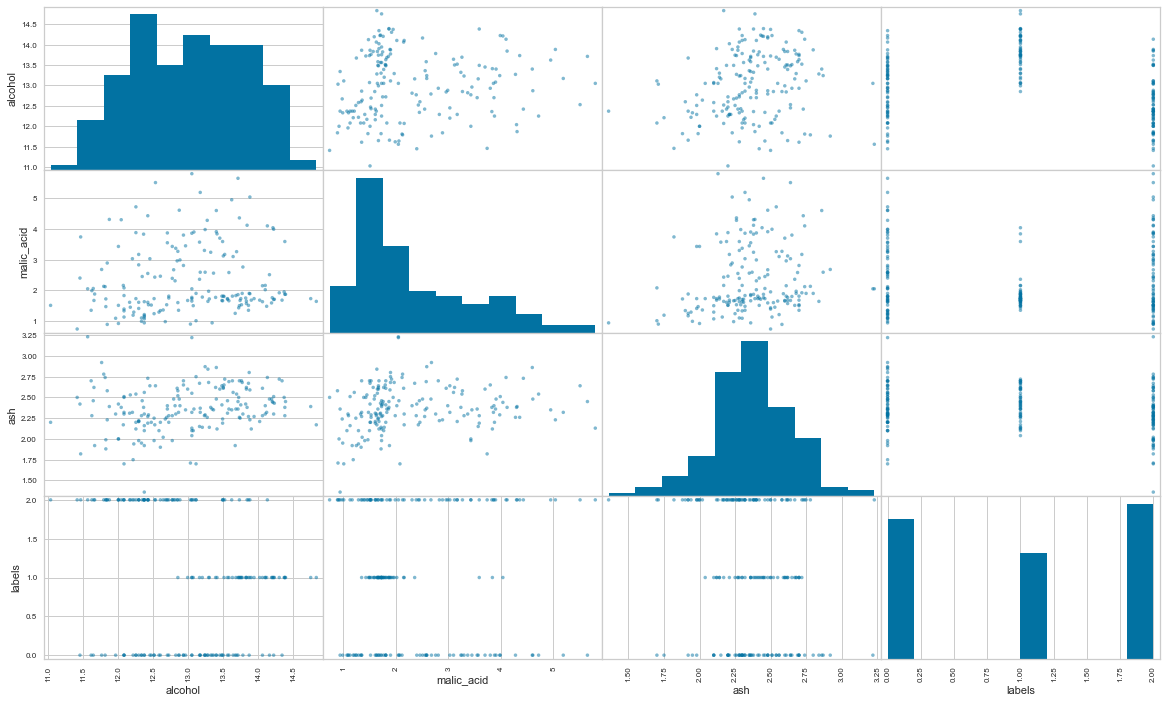

In [117]:
_ = pd.plotting.scatter_matrix(df_wine[bin1])

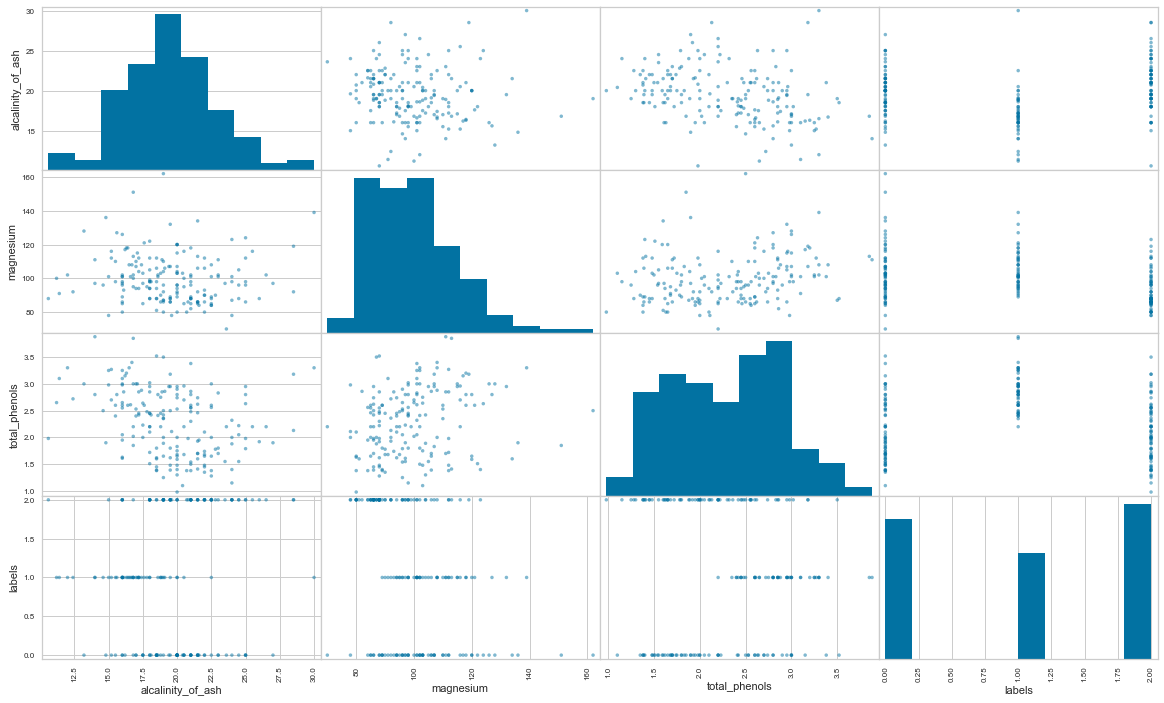

In [118]:
_ = pd.plotting.scatter_matrix(df_wine[bin2])

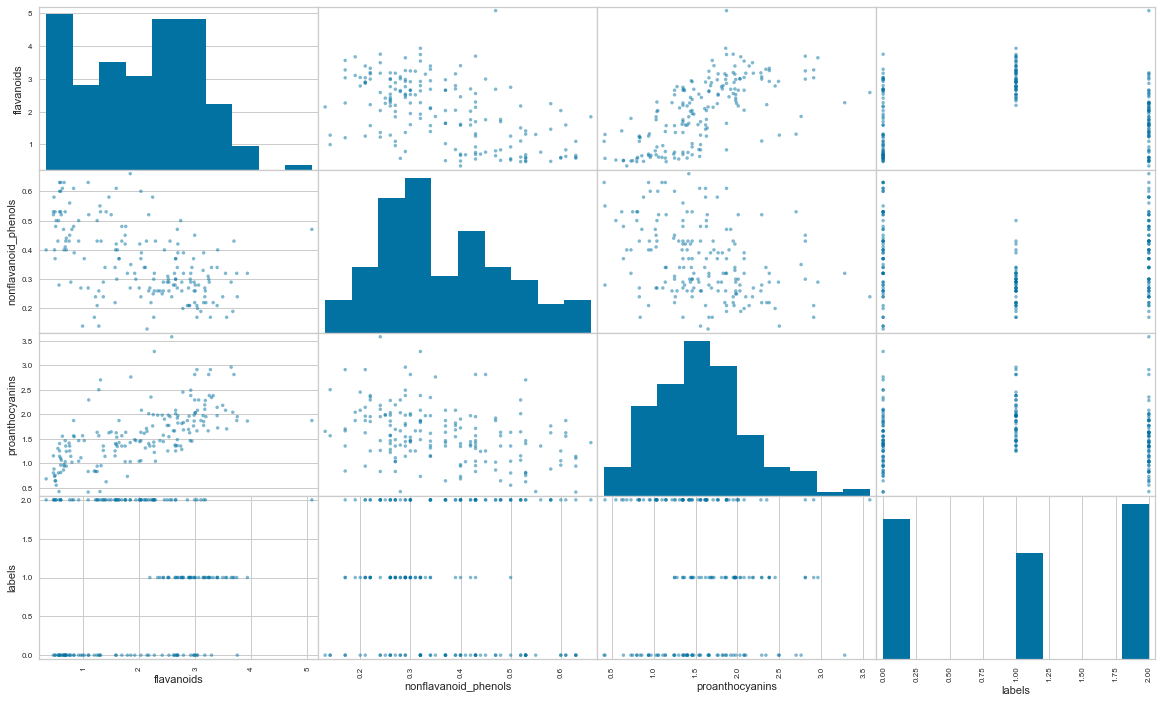

In [119]:
_ = pd.plotting.scatter_matrix(df_wine[bin3])

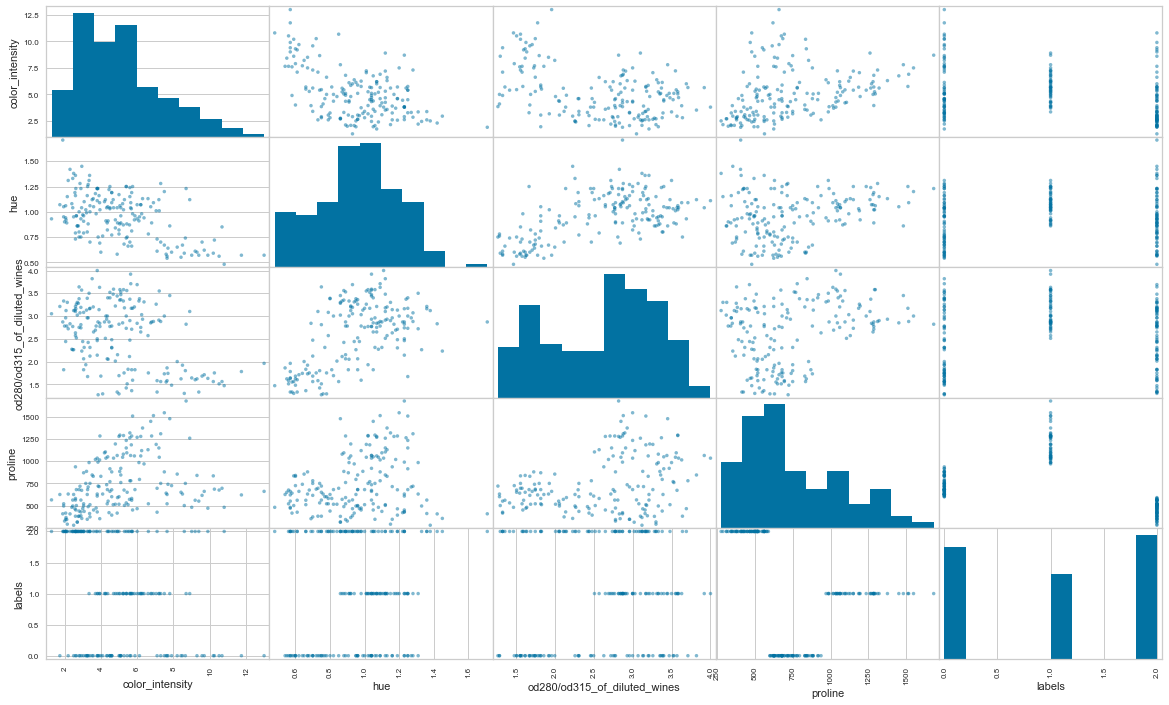

In [120]:
_ = pd.plotting.scatter_matrix(df_wine[bin4])

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [121]:
from sklearn.decomposition import PCA

In [122]:
pca = PCA(n_components=2)

In [123]:
pc2 = pca.fit_transform(X)

<AxesSubplot:>

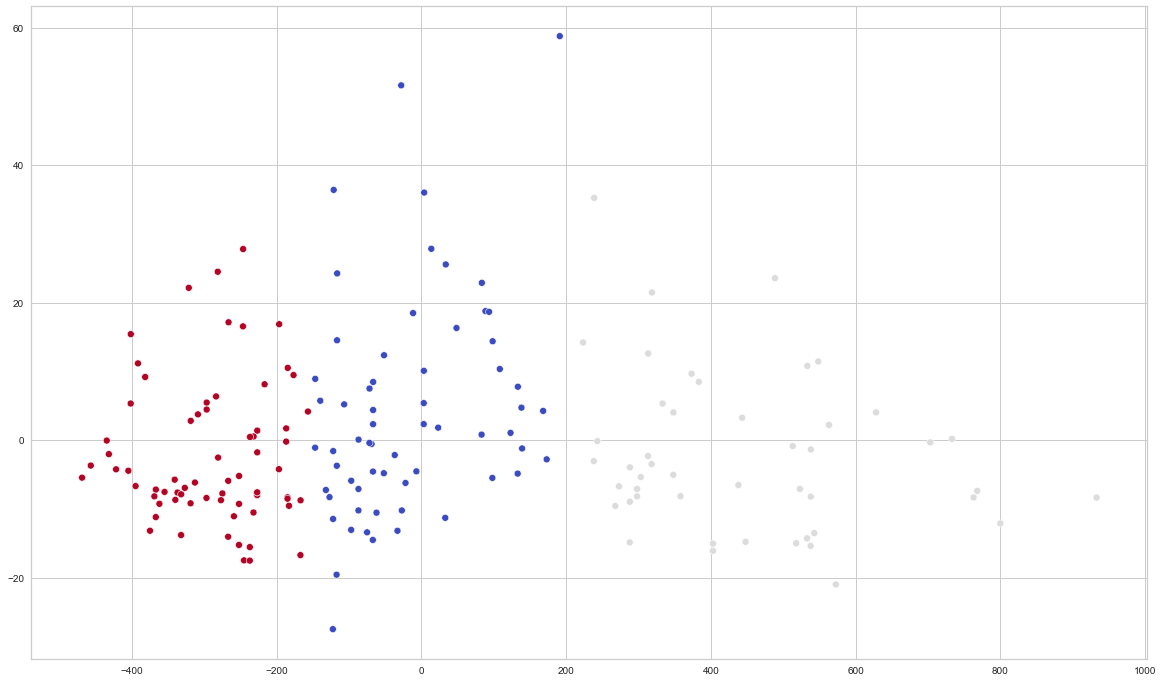

In [124]:
sns.scatterplot(x=pc2[:,0], y=pc2[:,1], c=df_wine['labels'], cmap='coolwarm')